In [1]:
from sklearn import datasets
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import seaborn as sns
import pandas as pd
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt
from source2 import *
#from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report, mean_squared_error,multilabel_confusion_matrix

In [2]:
#loading the data
path0 = "/Users/jenifervivar/Desktop/NERTO_2022/LIDAR_JUN17-30_2021/FXD20210717/"
variables = VAREXTRACT(path0)
variables.extract()
cnr_17 = variables.cnr_day
time_17 = pd.to_datetime(variables.time_day, unit = 's', utc = True)
pbl_17 = variables.atm_structures
windsp_17 = variables.ver_wind_speed
relat_beta = variables.relat_beta_day
spectral_width = variables.spectral_width_day
atm_struct = variables.atm_structures

In [ ]:
"""
flag_masks = "0,20,30,200,300,400,2000,3000,4000"
:flag_meanings = "No data or no detection, residual layer, mixed layer , unclassified cloud, ice cloud,
                water cloud, unclassified aerosol , spherical aerosol, aspherical aerosol";

"""

In [3]:
#creating dataframe
data ={"CNR":cnr_17, "Vertical_wind":windsp_17, "Relative_beta": relat_beta, "spectral_width":spectral_width,
       "Lidar_flags":atm_struct}
df = pd.DataFrame(data)
df.head()

,CNR,Vertical_wind,Relative_beta,spectral_width,Lidar_flags
0,-15.62,0.10,2.490000e-07,0.57,30.0
1,-14.61,-0.62,2.950000e-07,1.10,30.0
2,-13.37,-0.68,3.770000e-07,0.53,30.0
3,-11.88,-0.16,5.260000e-07,0.57,30.0
4,-10.96,-0.17,6.620000e-07,0.50,20.0


In [41]:
#selecting only the mixing height and the residual layer
df2 = df[(df.Lidar_flags<=30) & (df.Lidar_flags != 0) ]
df2.head()

,CNR,Vertical_wind,Relative_beta,spectral_width,Lidar_flags
0,-15.62,0.10,2.490000e-07,0.57,30.0
1,-14.61,-0.62,2.950000e-07,1.10,30.0
2,-13.37,-0.68,3.770000e-07,0.53,30.0
3,-11.88,-0.16,5.260000e-07,0.57,30.0
4,-10.96,-0.17,6.620000e-07,0.50,20.0


In [42]:
#checking the correlation out
df2.corr()["Lidar_flags"]

CNR               0.287900
Vertical_wind     0.025421
Relative_beta     0.057685
spectral_width    0.039163
Lidar_flags       1.000000
Name: Lidar_flags, dtype: float64

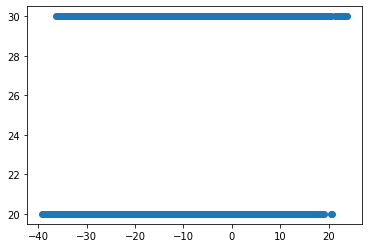

In [44]:
#since the flag values seem to be more correlated to the CNR I'm verifying the relationship
plt.scatter(df2["CNR"], df2["Lidar_flags"])
plt.show()

In [4]:
df.dtypes

CNR               float64
Vertical_wind     float64
Relative_beta     float64
spectral_width    float64
Lidar_flags       float64
dtype: object

In [13]:
df_residual = df[df.Lidar_flags == 20]
df_mixedL = df[df.Lidar_flags == 30]
df_uncloud = df[df.Lidar_flags == 200]
df_waterClo = df[df.Lidar_flags == 300]

In [14]:
%matplotlib inline

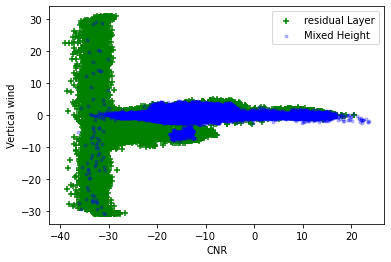

In [24]:
#plotting the scatter plots of each variable

plt.xlabel("CNR")
plt.ylabel("Vertical wind")
plt.scatter(df_residual["CNR"], df_residual["Vertical_wind"], color = "green", marker = "+", label= "residual Layer")
plt.scatter(df_mixedL["CNR"], df_mixedL["Vertical_wind"], color = "blue", marker = ".", alpha = 0.25, label = "Mixed Height")
#plt.scatter(df_uncloud["CNR"], df_uncloud["Vertical_wind"], color = "red", marker = "*", alpha = 0.1, label ="Unclassified Cloud")
#plt.scatter(df_waterClo["CNR"], df_waterClo["Vertical_wind"], color = "pink", marker = "^")
plt.legend()
plt.show()

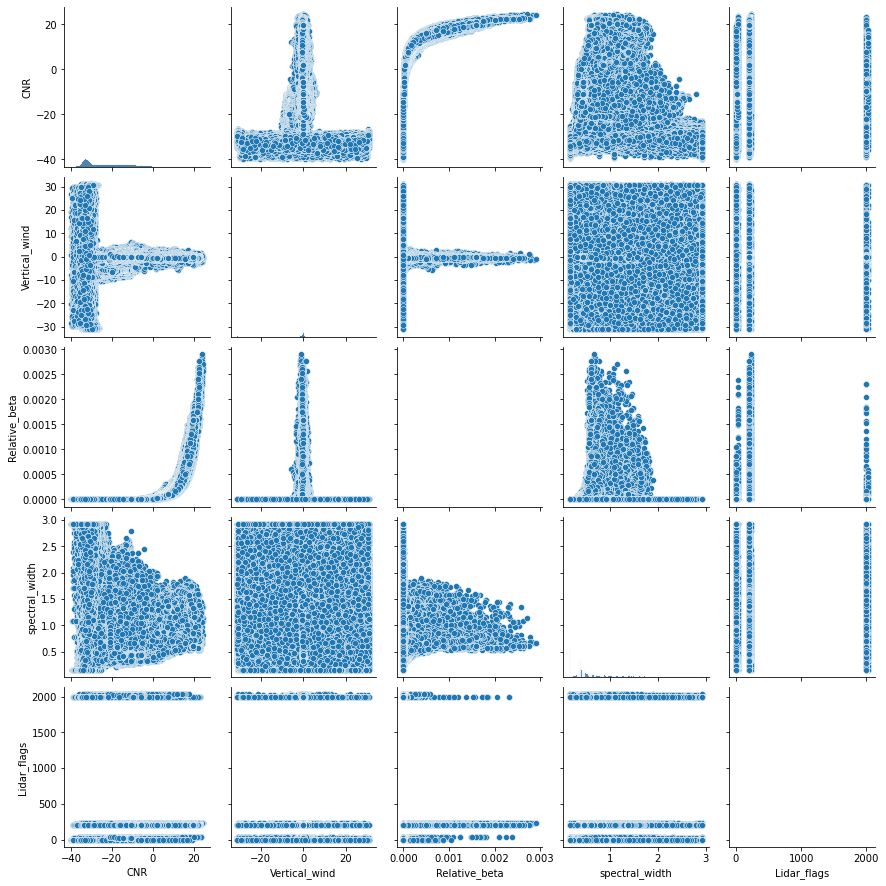

In [77]:
#peaking at the correlations, if any, of the whole dataset
sns.pairplot(df)

In [32]:

#setting the atmospheric structures as teh target variable for now and 2 columns as variables
X = df2[df.columns[:-1].values]
y = df2["Lidar_flags"]

sc = StandardScaler()
sc.fit(X)

#splitting data into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

#standarizing the data
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)


In [45]:
#attempting Logistic linear regression

from sklearn.linear_model import LogisticRegression


In [48]:
log_reg = LogisticRegression()
log_reg.fit(X_train_std, y_train)

LogisticRegression()

In [49]:
#making the predictions
y_pred = log_reg.predict(X_test_std)
y_pred

array([20., 20., 20., ..., 20., 20., 20.])

In [55]:
#how good is it doing?

def confusion_plot():
    cf_matrix = confusion_matrix(y_test, y_pred)

    ax = sns.heatmap(cf_matrix, annot=True, fmt = 'd', cmap='Blues')

    ax.set_title('Confusion Matrix for Logistic Regression classifier\n\n');
    ax.set_xlabel('\nPredicted Values')
    ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
    ax.xaxis.set_ticklabels(['Residual layer (20)','Mixing H (30)'])
    ax.yaxis.set_ticklabels(['Residual layer (20)','Mixing H (30)'])

## Display the visualization of the Confusion Matrix.
    plt.show()

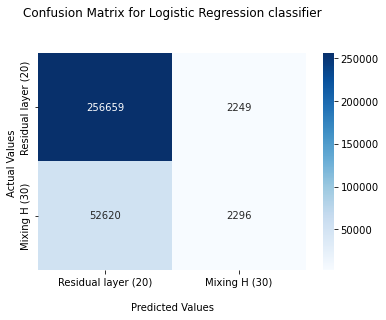

              precision    recall  f1-score   support

        20.0       0.99      0.83      0.90    309279
        30.0       0.04      0.51      0.08      4545

    accuracy                           0.83    313824
   macro avg       0.52      0.67      0.49    313824
weighted avg       0.98      0.83      0.89    313824



In [56]:
confusion_plot()
print(classification_report(y_pred,y_test))

In [ ]:
#accuracy is about 83%. The mixing height is not doing well. This might be due to data imbalance
plt.bar(df2["Lidar_flags"], len(df2))
plt.show()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify = y)

#standarizing the data
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

log_reg = LogisticRegression()
log_reg.fit(X_train_std, y_train)
y_pred = log_reg.predict(X_test_std)


In [ ]:
confusion_plot()
print(classification_report(y_pred,y_test))